In [1]:
import numpy as np 

def draw(n):
    hat = list(np.arange(1,n+1))
    
    while len(hat) > 1:
        xy = np.random.choice(hat,2,replace = False)
        diff = abs(xy[0]-xy[1])
        
        for i in xy:
            if i in hat:
                hat.remove(i)
                
        hat.append(diff)
    
    return hat[0]

# A = (draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025),draw(2025))
# print("Running the game 16 times gives:",A)

print(draw(2025))

3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def draw(n=3, sims=100):
    final_numbers = [] 

    for _ in range(sims):
        hat = list(np.arange(1, n + 1))

        while len(hat) > 1:
            xy = np.random.choice(hat, 2, replace=False)
            diff = abs(xy[0] - xy[1])

            for i in xy:
                if i in hat:
                    hat.remove(i)

            hat.append(diff)

        final_numbers.append(hat[0])  

    plt.figure(figsize=(10, 6))
    plt.hist(final_numbers, bins=range(0, n + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Final Numbers after {sims} Simulations (n={n})')
    plt.xlabel('Final Number in the Hat')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

interactive_plot = widgets.interactive(draw,
    n=widgets.IntSlider(min=2, max=30, step=1, value=4, description="N"),
    sims=widgets.IntSlider(min=10, max=1000, step=10, value=10, description="Simulations"))

interactive_plot

interactive(children=(IntSlider(value=4, description='N', max=30, min=2), IntSlider(value=10, description='Sim…

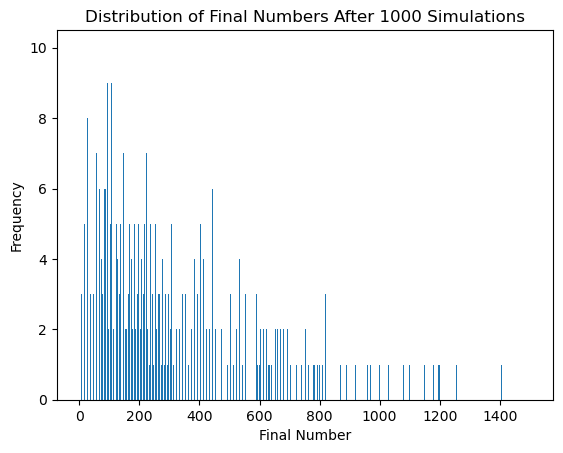

In [3]:
import random
import matplotlib.pyplot as plt

def draw(hat): # better optimised draw function
    while len(hat) > 1:
        
        a, b = random.sample(hat, 2)
        
        difference = abs(a - b)
        
        hat.remove(a)
        hat.remove(b)
        hat.append(difference)
        
    return hat[0]

def run_simulations(sims, N):
    results = []
    for _ in range(sims):
        initial_hat = list(range(1, N + 1))
        final_number = draw(initial_hat.copy())
        results.append(final_number)
    return results

sims = 1000
N = 2025

simulation_results = run_simulations(sims, N)

plt.hist(simulation_results, bins=range(min(simulation_results), max(simulation_results) + 2))
plt.title(f'Distribution of Final Numbers After {sims} Simulations')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.show()

In [4]:
from collections import Counter

counter = Counter(simulation_results)
most_common_values = counter.most_common(10)

print("10 Most Common Final Values:")
for value, count in most_common_values:
    print(f"Value: {value}, Frequency: {count}")

10 Most Common Final Values:
Value: 101, Frequency: 10
Value: 93, Frequency: 9
Value: 301, Frequency: 9
Value: 107, Frequency: 9
Value: 27, Frequency: 8
Value: 25, Frequency: 8
Value: 3, Frequency: 7
Value: 147, Frequency: 7
Value: 57, Frequency: 7
Value: 99, Frequency: 7


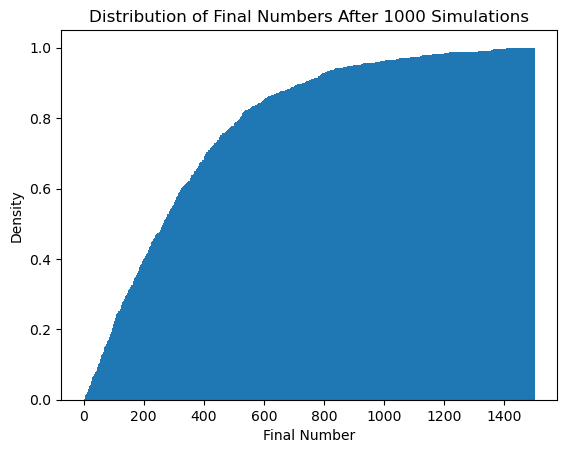

50 percent of values occur before: 264


In [5]:
import numpy as np
import matplotlib.pyplot as plt

cprob,_,_ = plt.hist(simulation_results, bins=range(min(simulation_results), max(simulation_results) + 2),density = True,cumulative = True)
plt.xlabel("Final Number")
plt.ylabel("Density")
plt.title(f"Distribution of Final Numbers After {sims} Simulations")
plt.show()

print('50 percent of values occur before:',np.searchsorted(cprob,0.5))

In [6]:
import numpy as np 
simulation_results_array = np.array(simulation_results)

mean = np.mean(simulation_results_array)
var = np.var(simulation_results_array)

print(f"Mean of the final numbers: {mean:.4f}")
print(f"Variance of the final numbers: {var:.4f}")

Mean of the final numbers: 331.6960
Variance of the final numbers: 79160.6196


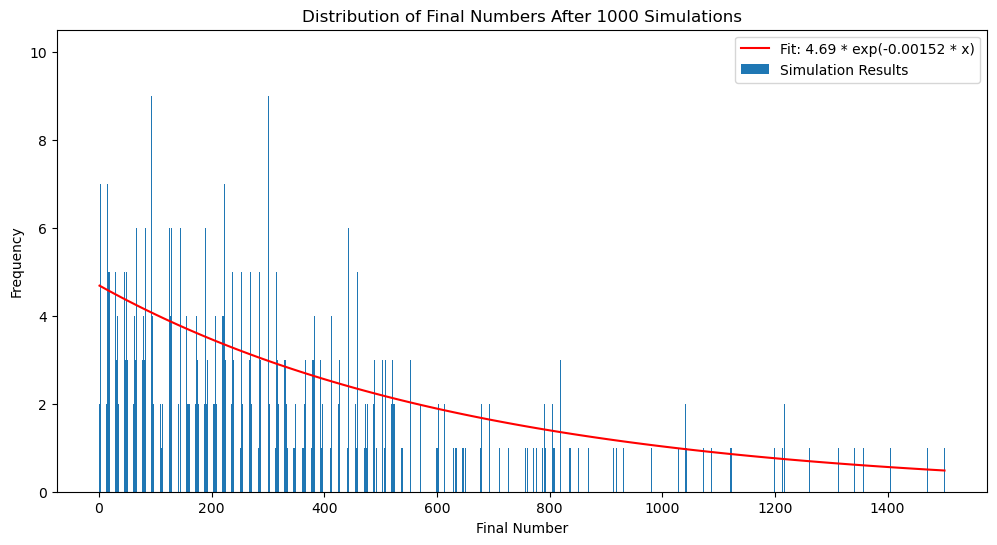

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_decay(x, a, b):
    return a * np.exp(b * x)

values, frequencies = zip(*sorted(counter.items()))
curve, _ = curve_fit(exp_decay, values, frequencies, p0=[max(frequencies),0])

xvals = np.linspace(min(values), max(values), 119)
yvals = exp_decay(xvals, *curve)

plt.figure(figsize=(12, 6))
plt.bar(values, frequencies, label="Simulation Results")
plt.plot(xvals, yvals, color="red", label=f"Fit: {curve[0]:.2f} * exp({curve[1]:.5f} * x)")
plt.xlabel("Final Number")
plt.ylabel("Frequency")
plt.title(f"Distribution of Final Numbers After {sims} Simulations")
plt.legend()
plt.show()


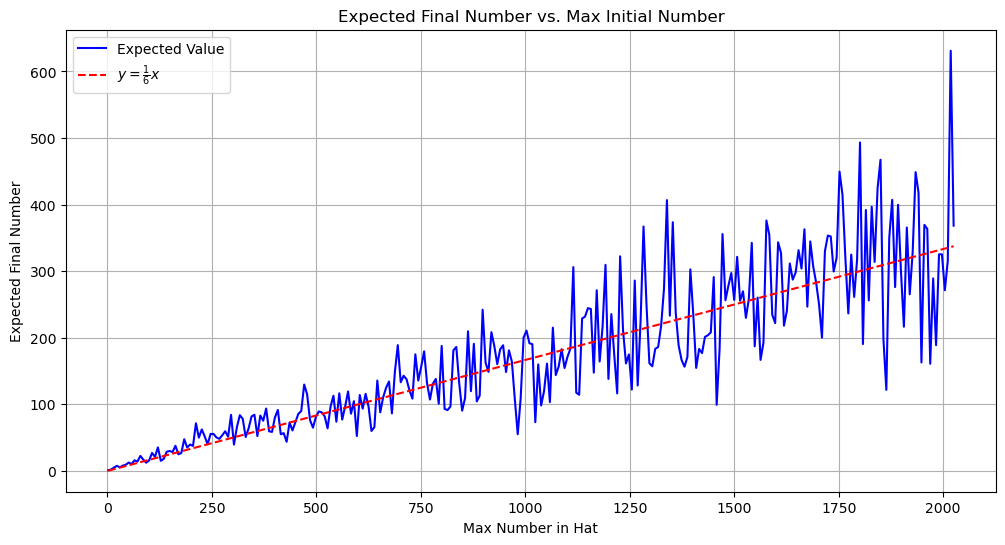

In [8]:
import random
import matplotlib.pyplot as plt

def draw(hat):
    while len(hat) > 1:
        
        a, b = random.sample(hat, 2)
        
    
        difference = abs(a - b)
        
        hat.remove(a)
        hat.remove(b)
        hat.append(difference)
        
    return hat[0]


def run_simulations(sims, N):
    results = []
    for _ in range(sims):
        initial_hat = list(range(1, N + 1))
        final_number = draw(initial_hat.copy())
        results.append(final_number)
    return sum(results) / sims  


sims = 10
N = 2025


expected_values = []
x_values = list(range(2, N + 1, 7))
y_values = [(1/6) * x for x in x_values]

for N in x_values:
    expected_value = run_simulations(sims, N)
    expected_values.append(expected_value)


plt.figure(figsize=(12, 6))
plt.plot(x_values, expected_values, label="Expected Value", color='blue')
plt.plot(x_values, y_values, label=r"$y = \frac{1}{6}x$", color='red', linestyle='dashed')
plt.xlabel('Max Number in Hat')
plt.ylabel('Expected Final Number')
plt.title('Expected Final Number vs. Max Initial Number')
plt.legend()
plt.grid()
plt.show()